# 事前準備

In [ ]:
# Initializing
from google.colab import drive

drive.mount('/content/drive')
# Define constant value
RESEARCH_WORK_PATH = "/content/drive/My Drive/Colab Notebooks/BachelorResearch/"

Mounted at /content/drive


# STFTの手順
音声信号のある時間範囲を窓で区切ってフーリエ変換して、その時間範囲の周波数スペクトルを計算します。
窓をずらしながら繰り返すことで、周波数スペクトルの時間経過の行列Dが得られます。
## STFTの主なパラメータ
n_fft（窓の長さ）
デフォルト値は2048

hop_length（窓の移動幅）
デフォルト値はn_fft/4


### 参考文献


音声ファイル特徴量変換（その1）STFT
https://work-in-progress.hatenablog.com/entry/2020/02/22/155653

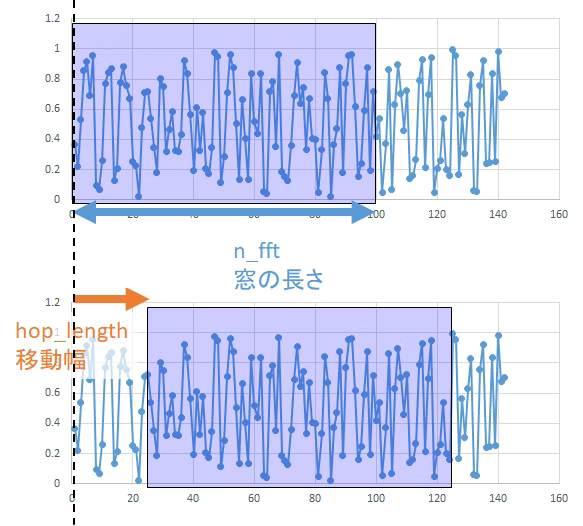

# 動作テスト

Audio wave shape:


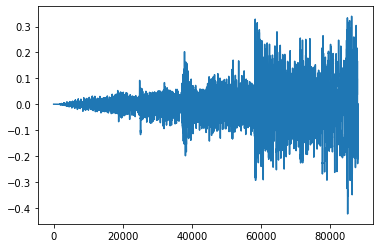


FFT後の配列は虚数配列になっている。
FFTized wave raw output:

[-22.2319044 +0.j         -10.75526939-5.99961348j
 -14.0174094 -3.54739714j ...  -7.58021027+2.67771345j
 -14.0174094 +3.54739714j -10.75526939+5.99961348j]

虚数は実数空間にプロットできない。
虚数の距離がほしいので、ユークリッド距離を用いて算出。

Audio freq shape:


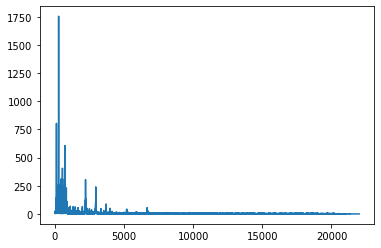

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import librosa
%matplotlib inline

# audio_path="/content/drive/MyDrive/Colab Notebooks/BachelorResearch/beep-01a.wav"\
audio_path = "/content/drive/MyDrive/Colab Notebooks/BachelorResearch/MER_audio_taffc_dataset_wav/2s/Q1/Q1.MT0000040632_1.wav"
raw, sr = librosa.load(audio_path, sr=44000)
print("Audio wave shape:")
plt.plot(raw)
plt.show()


F = np.fft.fft(raw)

print("""
FFT後の配列は虚数配列になっている。
FFTized wave raw output:
""")
print(F)

print("""
虚数は実数空間にプロットできない。
虚数の距離がほしいので、ユークリッド距離を用いて算出。
""")
amp = np.abs(F)

print("Audio freq shape:")
freq = np.linspace(0, sr, sr)
plt.plot(freq[:int(sr/2)+1], amp[:int(sr/2)+1])
plt.show()

# STFT変換をするコード

0


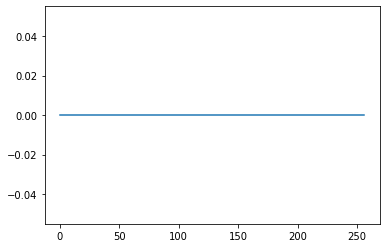

1


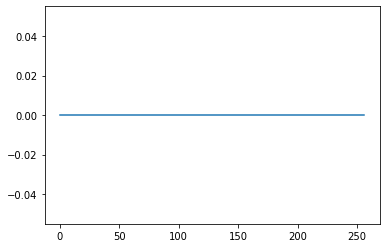

2


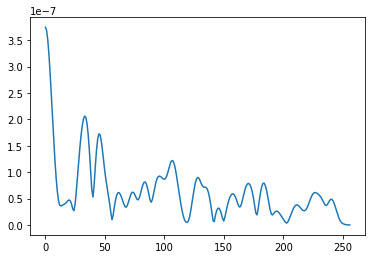

3


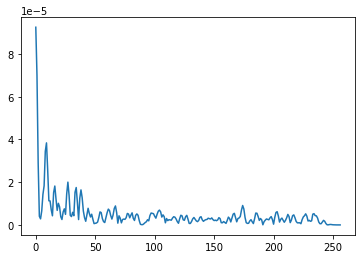

4


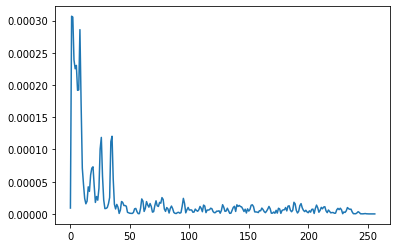

5


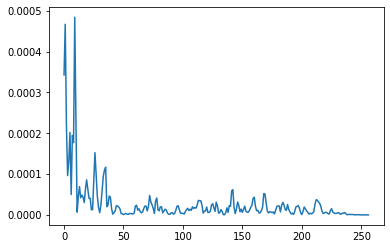

6


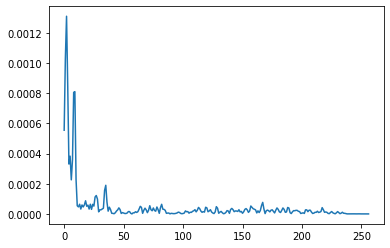

7


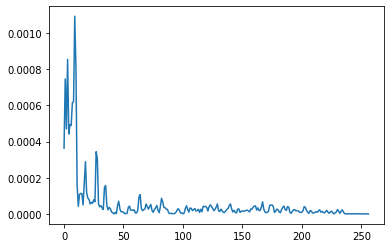

8


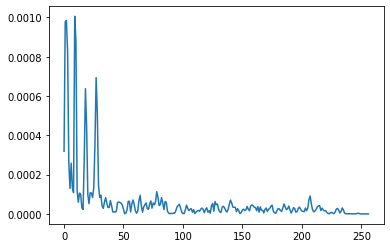

9


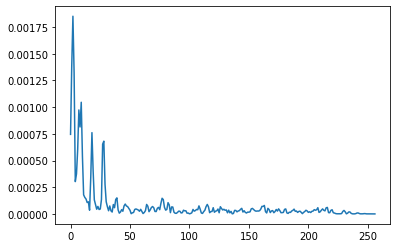

10


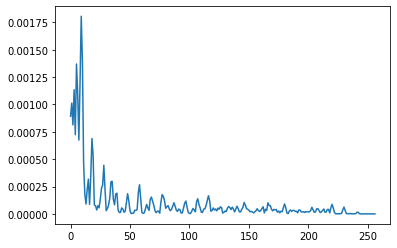

11


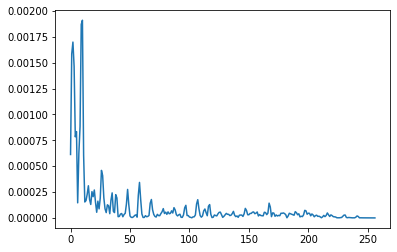

12


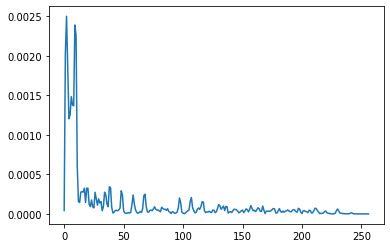

13


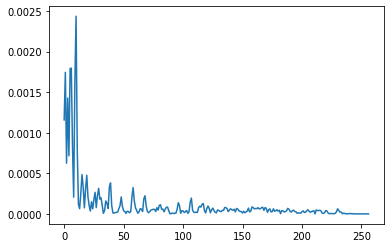

14


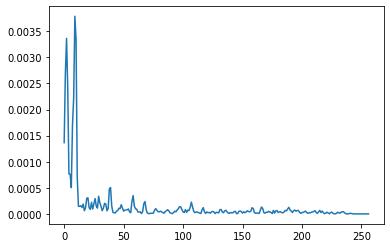

15


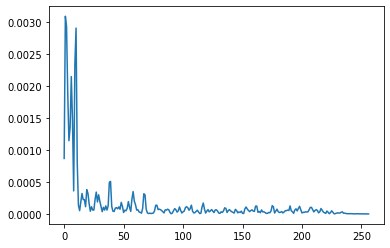

16


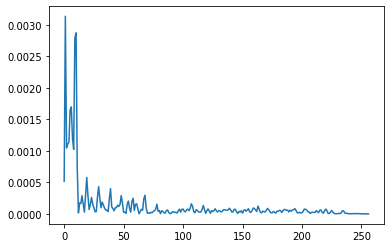

17


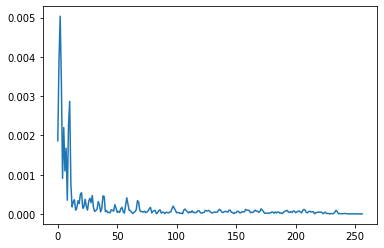

18


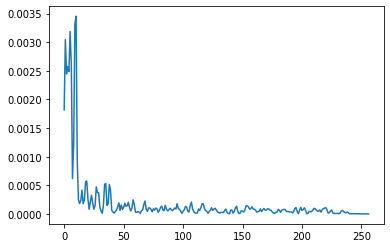

19


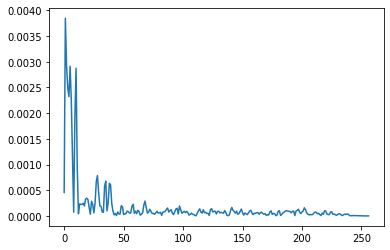

20


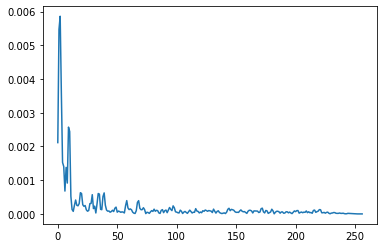

21


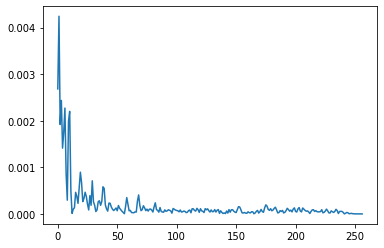

22


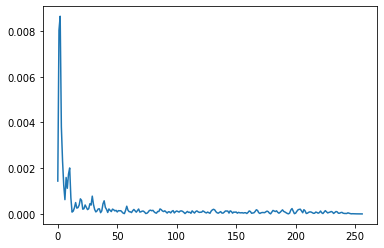

23


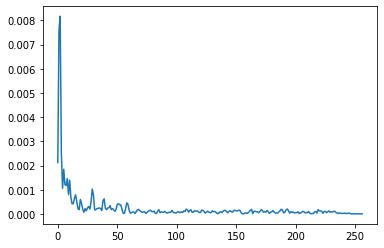

24


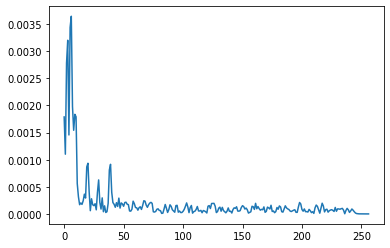

25


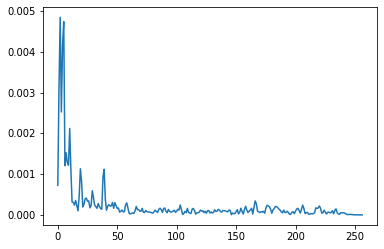

26


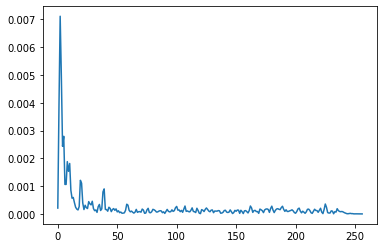

27


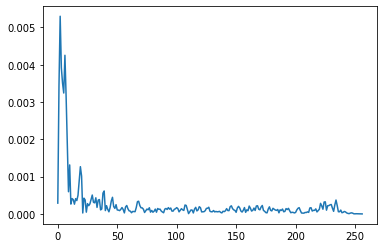

28


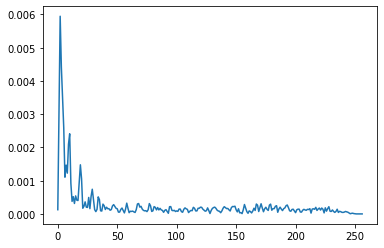

29


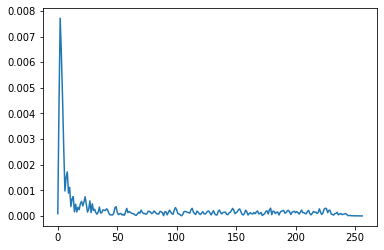

30


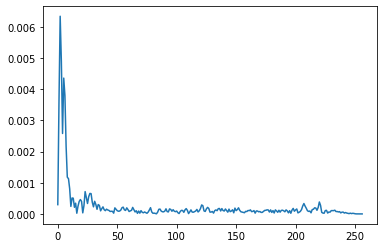

31


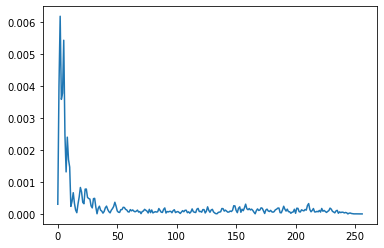

32


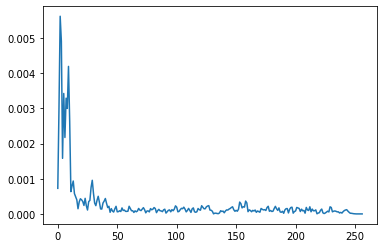

33


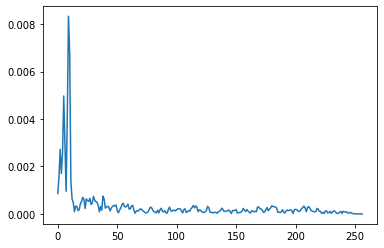

34


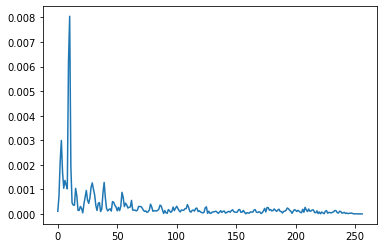

35


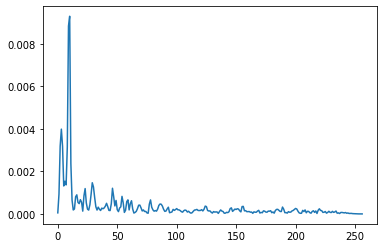

36


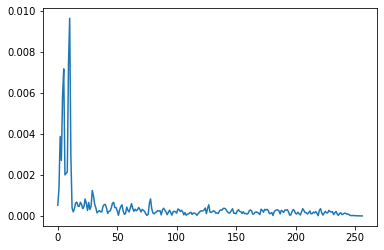

37


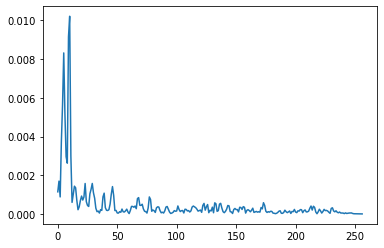

38


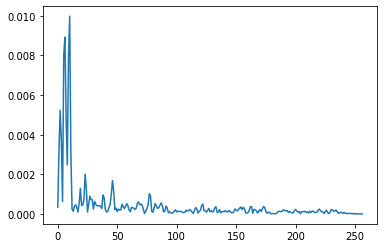

39


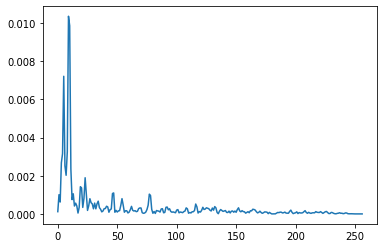

40


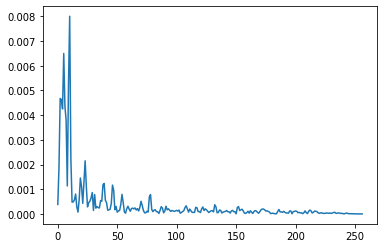

41


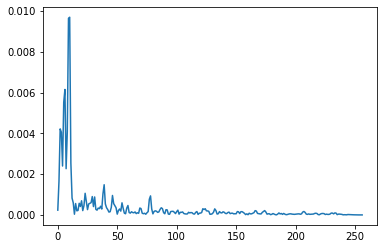

42


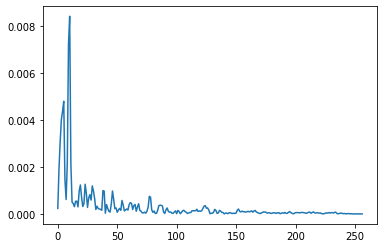

43


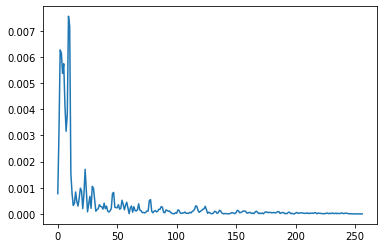

44


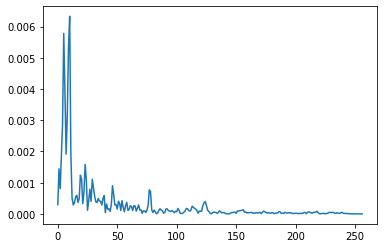

45


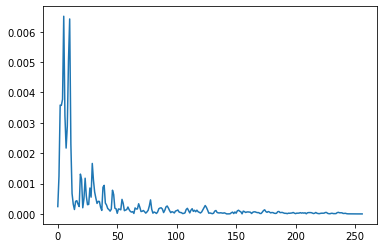

46


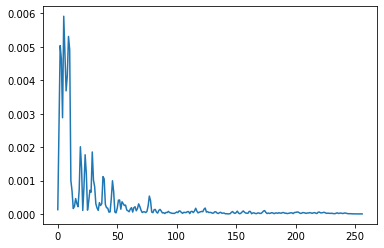

47


In [ ]:
import librosa
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

# librosa version
'''
def stft_song(file,n_fft,hop_length):
  y, sr = librosa.load(file)
  stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length)) # オーバラップ率　0％
  return stft
'''

def stft_song(file,n_fft,hop_length):
  y, sr = librosa.load(file)
  stft, t, Zxx = signal.stft(y, fs=sr, nperseg=n_fft)
  for i in range(len(Zxx.T)):
    print(i)
    plt.plot(np.abs(Zxx.T[i]))
    plt.show()
  return Zxx


timeseries_length = 128
hop_length = 256
n_fft = 512

# song = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/Q1/Q1.MT0028648077.wav_1.wav"
# song = RESEARCH_WORK_PATH + "beep-01a.wav"
song = "/content/drive/MyDrive/Colab Notebooks/BachelorResearch/MER_audio_taffc_dataset_wav/2s/Q1/Q1.MT0000040632_1.wav"

stft_song(song,n_fft,hop_length)


## 使用ディレクトリの存在確認と作成

In [ ]:
import os
if not os.path.exists(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/stft/"):
  os.mkdir(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/stft/")
if not os.path.exists(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/stft/Q1"):
  os.mkdir(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/stft/Q1")
if not os.path.exists(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/stft/Q2"):
  os.mkdir(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/stft/Q2")
if not os.path.exists(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/stft/Q3"):
  os.mkdir(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/stft/Q3")
if not os.path.exists(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/stft/Q4"):
  os.mkdir(RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/stft/Q4")

In [ ]:
import os
import pathlib
import librosa
import numpy as np


def audio_stft(filepath,n_fft = 512,hop_length = 256):
  try:
    y, sr = librosa.load(filepath)
    stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length)) # オーバラップ率　0％
    dirs = filepath.split("/")
    output_path_str = "stft/" + dirs[len(dirs)-2] + '/' + dirs[len(dirs)-1] # Make end of path ex./stft/Q1/Q1.MT0018024152_9.wav
    output_path_str = pathlib.Path(filepath).parents[1] / pathlib.Path(output_path_str) # Make head of paht ex./content/drive/My Drive/Colab Notebooks/BachelorResearch/MER_audio_taffc_dataset_wav/2s



  # この文でoutput_path_strが作られる。ex: output_path_dir = RESEARCH_WORK_DIR + /MER_AUDIO_HOGE/2s/fft/
  
    print(output_path_str)
    for i in range(len(np.abs(stft.T))):
      print(".", end='')
      output_path_str_add_stft_num = str(output_path_str.parent) + '/' + output_path_str.stem + '_' + str(i) 
      # np.save(output_path_str_add_stft_num, stft.T[i])
      plt.plot(np.abs(stft.T)[i])
      plt.show()
    print("Done.")
    return 
  except Exception:
    return
    



def path_to_audiofiles(dir_folder):
    list_of_audio = []
    for file in os.listdir(dir_folder):
        if file.endswith(".wav"):
            directory = "%s%s" % (dir_folder, file)
            list_of_audio.append(directory)
    return list_of_audio

Q1_2s = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/Q1/"
Q2_2s = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/Q2/"
Q3_2s = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/Q3/"
Q4_2s = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/2s/Q4/"

'''
for audio in path_to_audiofiles(Q1_2s):
  audio_stft(audio)
for audio in path_to_audiofiles(Q2_2s):
  audio_stft(audio)
  '''
for audio in path_to_audiofiles(Q3_2s):
  audio_stft(audio)
for audio in path_to_audiofiles(Q4_2s):
  audio_stft(audio)


KeyboardInterrupt: ignored